https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

**Раскрытие некоторых признаков:**

**acousticness - акустичность**

Показатель достоверности от 0.0 до 1.0 того, является ли трек акустическим. 1.0 представляет высокую уверенность в том, что трек является акустическим.
>= 0 <= 1

**danceability - танцевальность**

Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0.0 является наименее танцевальным, а 1.0 - наиболее танцевальным.

**duration_ms - длительность**

Длительность трека в миллисекундах.

**energy - энергия**

Энергия - это показатель от 0.0 до 1.0, который представляет собой воспринимаемую меру интенсивности и активности. Как правило, энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал обладает высокой энергетикой, в то время как прелюдия Баха набирает низкие баллы по шкале. Особенности восприятия, влияющие на этот атрибут, включают динамический диапазон, воспринимаемую громкость, тембр, частоту начала и общую энтропию.

**instrumentalness - инструментальность**

Предсказывает, не содержит ли трек вокала. Звуки "Ooh" и "aah" в этом контексте рассматриваются как инструментальные. Треки с рэпом или произнесенными словами явно "вокальные". Чем ближе значение инструментальности к 1.0, тем больше вероятность, что трек не содержит вокала. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность выше, когда значение приближается к 1,0.

**key - ключ**

Ключ, в котором находится трек. Целые числа сопоставляются с высотой тона с использованием стандартной нотации класса высоты тона. Например, 0 = C, 1 = C♯ / D♭, 2 = D и так далее. Если ключ не был обнаружен, значение равно -1.
>= -1 <= 11

**liveness - живучесть**

Определяет присутствие аудитории в записи. Более высокие значения живучести представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек является живым.

**loudness - громкость**

Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость - это качество звука, которое является основным психологическим коррелятом физической силы (амплитуды). Значения обычно варьируются от -60 до 0 дБ.

**mode - модальность** 

Режим указывает модальность (мажорную или минорную) трека, тип гаммы, из которой извлекается его мелодическое содержание. Мажор представлен 1, а минор равен 0.

**speechiness - красноречие**

Speechiness определяет наличие произнесенных слов в треке. Чем больше запись похожа исключительно на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произносимых слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо в виде разделов, либо многоуровневые, включая такие случаи, как рэп. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь.

**tempo - темп**

Общий предполагаемый темп трека в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темп данного произведения, который напрямую зависит от средней продолжительности такта.

**time_signature - временная сигнатура**

Примерная временная подпись. Временная сигнатура (метр) - это условное обозначение, определяющее, сколько ударов приходится на каждый такт (или такт). Временная подпись варьируется от 3 до 7, что указывает на временные подписи от "3/4" до "7/4".
>= 3 <= 7

**valence - валентность**

Показатель от 0.0 до 1.0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), в то время как треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые).

>= 0 <= 1

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
data = pd.read_csv("SpotifyFeatures.csv")
data

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
data.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

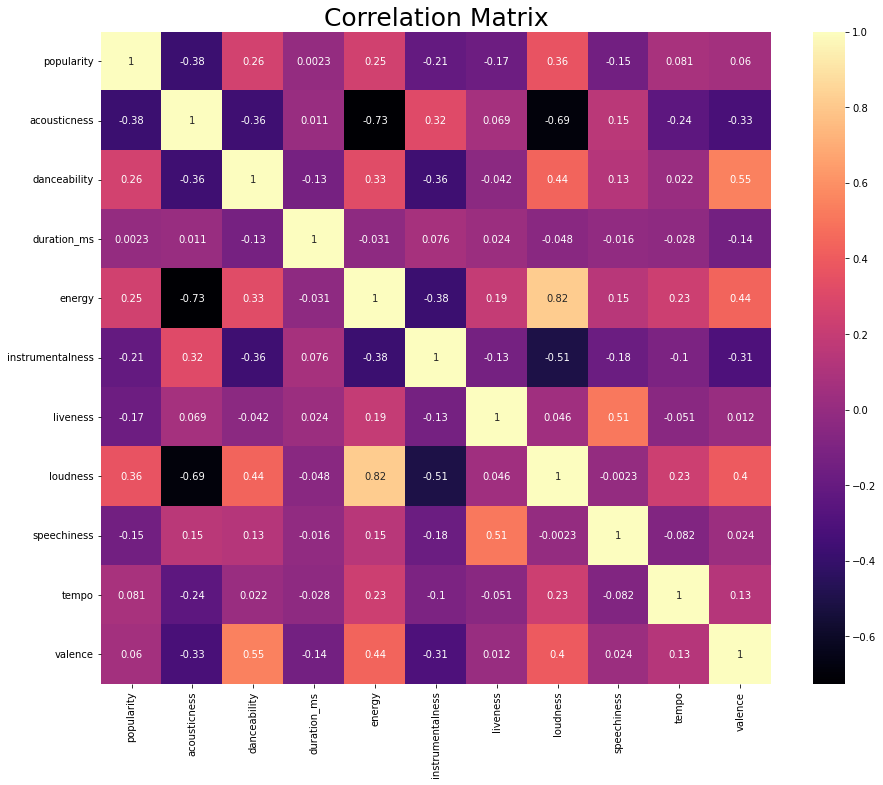

In [ ]:
plt.figure(figsize=(15,12))
plt.title('Correlation Matrix', fontsize=25)
sns.heatmap(data.corr(), cmap='magma', annot=True)
plt.show()

Text(0, 0.5, 'Артист')

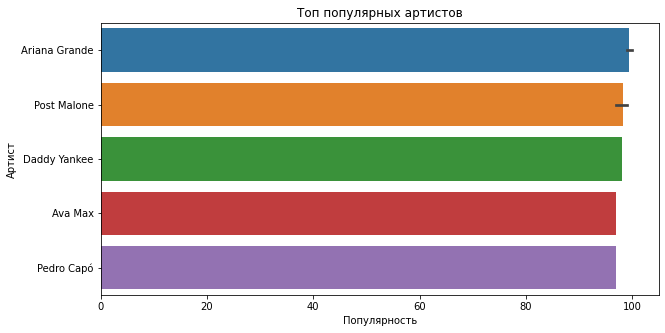

In [ ]:
sns.set_style()
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending = False).head(12)
sns.barplot(y='artist_name', x='popularity', data = famous).set(title= "Топ популярных артистов")
plt.xlabel("Популярность")
plt.ylabel("Артист")

Text(0, 0.5, 'Название трека')

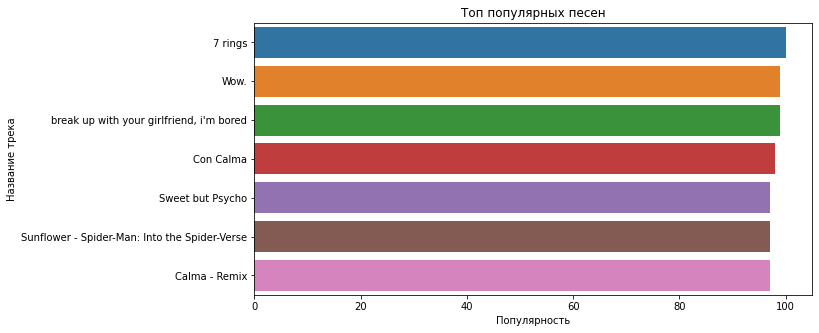

In [ ]:
sns.set_style()
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending = False).head(12)
sns.barplot(y='track_name', x='popularity', data = famous).set(title= "Топ популярных песен")
plt.xlabel("Популярность")
plt.ylabel("Название трека")

Text(0, 0.5, 'Жанры')

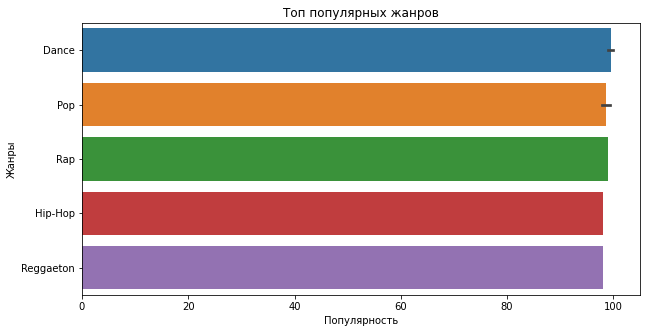

In [ ]:
sns.set_style()
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending = False).head(10)
sns.barplot(y='genre', x='popularity', data = famous).set(title= "Топ популярных жанров")
plt.xlabel("Популярность")
plt.ylabel("Жанры")

Text(0, 0.5, 'Жанры')

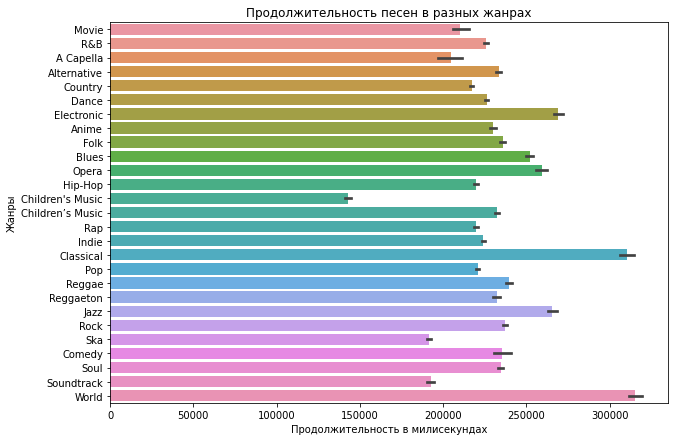

In [ ]:
plt.figure(figsize=(10,7))
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y=data["genre"],x=data["duration_ms"],data=data).set(title="Продолжительность песен в разных жанрах")
plt.xlabel("Продолжительность в милисекундах")
plt.ylabel("Жанры")

Text(0, 0.5, 'Популярность')

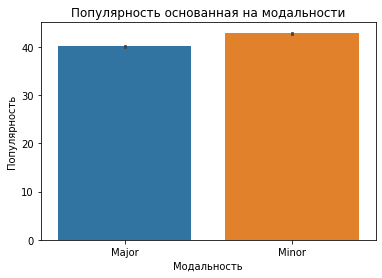

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', data = data)
plt.title('Популярность основанная на модальности')
plt.xlabel("Модальность")
plt.ylabel("Популярность")

In [ ]:
data = data.drop(["track_id","key","mode","time_signature"],1)
df = data.copy()
df = df.drop(["artist_name","track_name"],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [ ]:
colums = ['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']
scaler = StandardScaler()
df[colums] = scaler.fit_transform(df[colums])

In [ ]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,Movie,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,Movie,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,Movie,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,Movie,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618


In [ ]:
def change_string(s):
    return ' '.join(s.replace('"', ' ').replace(',', ' ').split('|'))

df['genre'] = df.genre.apply(change_string)
df

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744
1,Movie,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435
2,Movie,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212
3,Movie,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384
4,Movie,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,-0.116961,-1.028056,0.714601,0.766109,0.542948,1.306938,-0.658233,-0.176072,-0.480628,-0.068759,1.949833
232721,Soul,-0.171936,-0.946143,1.242596,0.397901,0.425281,-0.486912,0.110912,0.437780,-0.469308,-0.124166,1.976749
232722,Soul,0.322844,1.500814,-0.201309,-0.573103,-0.576788,-0.489819,-0.607797,0.214712,0.146805,-1.085205,1.376899
232723,Soul,0.157917,-0.300367,1.027088,-0.106615,0.504991,-0.489819,0.595095,0.405603,0.136025,-0.570752,0.131056


In [ ]:
str_  = ''
for item in df['genre']:
    str_ += ' ' + item
genres_list = list(set(str_.strip().split(' ')))
genres_list

['Anime',
 'Capella',
 'Rock',
 'Jazz',
 'Soul',
 'Music',
 'Folk',
 'Ska',
 'Indie',
 'Classical',
 'A',
 'Country',
 'Hip-Hop',
 'Rap',
 'Dance',
 'Soundtrack',
 'Opera',
 'Movie',
 'Blues',
 'Reggae',
 'Electronic',
 'Children’s',
 "Children's",
 'Pop',
 'World',
 'Reggaeton',
 'Alternative',
 'R&B',
 'Comedy']

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.genre)
genres = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=genres)
tfidf_matrix.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,alternative,anime,blues,capella,children,classical,comedy,country,dance,electronic,...,opera,pop,rap,reggae,reggaeton,rock,ska,soul,soundtrack,world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = tfidf_matrix
y = df.popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.3955523234620444

In [ ]:
RMSE = math.sqrt(MSE)
print(RMSE)

0.628929505955989


In [ ]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [ ]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
predicted = km.fit_predict(num)
data['predicted'] = predicted
normalize_column('predicted')

In [ ]:
class SongRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data
    
    #если нам нужно изменить данные
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #функция, которая возвращает рекомендации, мы также можем выбрать количество песен, которые будут рекомендованы
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #выбираем данные для нашей песни
        song = self.rec_data_[(self.rec_data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        #сброс данных с помощью нашей песни
        res_data = self.rec_data_[self.rec_data_.track_name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #индексы нечисловых столбцов
                if not col in [0,1,2]:
                    #вычисление манхэттенских расстояний для каждого числового признака
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #сортировка наших данных по возрастанию по функции "расстояние"
        res_data = res_data.sort_values('distance')
        columns = ['genre', 'artist_name', 'track_name', 'distance']
        return res_data[columns][:amount]

In [ ]:
recommender = SongRecommender(data)

In [ ]:
data.loc[data['track_name'] == 'Pyramids']

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,predicted
1525,Alternative,Frank Ocean,Pyramids,0.61,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
67714,Hip-Hop,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
77509,Children’s Music,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
110819,Pop,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
114834,Rap,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
152931,R&B,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0
192122,Soul,Frank Ocean,Pyramids,0.65,0.013454,0.373458,0.104294,0.64764,0.000076,0.817233,0.824683,0.027519,0.477937,0.196,0.0


In [ ]:
recommender.get_recommendations('Pyramids', 10)

100%|██████████| 232718/232718 [00:11<00:00, 20689.72it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,genre,artist_name,track_name,distance
207710,World,Jesus Culture,Revelation Song - Live,0.289372
121658,Rap,Christine D'Clario,Que Se Abra el Cielo,0.408868
207449,World,Elevation Worship,Yours (Glory and Praise),0.410361
207752,World,Israel Houghton,Jesus At the Center - Live,0.434873
207636,World,En Espíritu Y En Verdad,Cuan Grande Es Dios,0.457691
217165,World,Hillsong UNITED,Take Heart - Live,0.467990
208841,World,Bethel Music,Cornerstone (Spontaneous),0.491786
208063,World,Israel & New Breed,Tu presencia es el Cielo,0.517223
207620,World,Jesus Culture,Rooftops - Live,0.522869
207365,World,Jesus Culture,Miracles - Live,0.535304


In [ ]:
data.loc[data['track_name'] == '2009']

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,predicted
66990,Hip-Hop,Mac Miller,2009,0.74,0.773092,0.510782,0.060063,0.496486,0.000164,0.088082,0.766784,0.523709,0.587129,0.173,0.111111
87301,Rap,Mac Miller,2009,0.74,0.773092,0.510782,0.060063,0.496486,0.000164,0.088082,0.766784,0.523709,0.587129,0.173,0.111111
108924,Pop,Mac Miller,2009,0.74,0.773092,0.510782,0.060063,0.496486,0.000164,0.088082,0.766784,0.523709,0.587129,0.173,0.111111


In [ ]:
recommender.get_recommendations('2009', 10)

100%|██████████| 232722/232722 [00:10<00:00, 21299.25it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,genre,artist_name,track_name,distance
109121,Pop,Drake,Successful (feat. Trey Songz & Lil Wayne),0.724600
87745,Rap,Drake,Successful (feat. Trey Songz & Lil Wayne),0.724600
67047,Hip-Hop,Drake,Successful (feat. Trey Songz & Lil Wayne),0.724600
1110,Alternative,6LACK,Pretty Little Fears (feat. J. Cole),0.728673
88522,Hip-Hop,Token,No Service,0.771822
152293,R&B,6LACK,Pretty Little Fears (feat. J. Cole),0.808673
77058,Children’s Music,6LACK,Pretty Little Fears (feat. J. Cole),0.808673
66676,Hip-Hop,6LACK,Pretty Little Fears (feat. J. Cole),0.808673
107996,Pop,6LACK,Pretty Little Fears (feat. J. Cole),0.808673
87112,Rap,6LACK,Pretty Little Fears (feat. J. Cole),0.808673


Из-за разных жанров для одной и той же песни, в рекомендациях всплывают дубликаты. Попробуем исключить их из датасета и построить рекомендации

In [ ]:
data = data.drop(["genre"],1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,predicted
0,Henri Salvador,C'est beau de faire un Show,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814,0.333333
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0.01,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816,0.333333
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368,0.777778
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227,0.777778
4,Fabien Nataf,Ouverture,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Slave,Son Of Slide,0.39,0.003855,0.676000,0.056136,0.714709,0.544545,0.075561,0.744311,0.009949,0.400722,0.962,0.555556
232721,Jr Thomas & The Volcanos,Burning Fire,0.38,0.033032,0.781139,0.048227,0.683677,0.000881,0.229550,0.809825,0.012172,0.392666,0.969,0.555556
232722,Muddy Waters,(I'm Your) Hoochie Coochie Man,0.47,0.904618,0.493617,0.027372,0.419408,0.000000,0.085658,0.786018,0.133150,0.252941,0.813,0.777778
232723,R.LUM.R,With My Words,0.44,0.263052,0.738226,0.037391,0.704699,0.000000,0.326487,0.806391,0.131033,0.327737,0.489,0.000000


In [ ]:
data.duplicated().sum()

41672

In [ ]:
data = data[~data.duplicated()==1]
data.shape

(191053, 14)

In [ ]:
data.duplicated().sum()

0

In [ ]:
class SongRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data
    
    #если нам нужно изменить данные
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #функция, которая возвращает рекомендации, мы также можем выбрать количество песен, которые будут рекомендованы
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #выбираем данные для нашей песни
        song = self.rec_data_[(self.rec_data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        #сброс данных с помощью нашей песни
        res_data = self.rec_data_[self.rec_data_.track_name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #индексы нечисловых столбцов
                if not col in [0,1]:
                    #вычисление манхэттенских расстояний для каждого числового признака
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #сортировка наших данных по возрастанию по функции "расстояние"
        res_data = res_data.sort_values('distance')
        columns = ['artist_name', 'track_name', 'distance']
        return res_data[columns][:amount]

In [ ]:
recommender = SongRecommender(data)

In [ ]:
recommender.get_recommendations('Pyramids', 10)

100%|██████████| 191051/191051 [00:07<00:00, 26307.28it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artist_name,track_name,distance
207710,Jesus Culture,Revelation Song - Live,0.289372
121658,Christine D'Clario,Que Se Abra el Cielo,0.408868
207449,Elevation Worship,Yours (Glory and Praise),0.410361
207752,Israel Houghton,Jesus At the Center - Live,0.434873
207636,En Espíritu Y En Verdad,Cuan Grande Es Dios,0.457691
217165,Hillsong UNITED,Take Heart - Live,0.467990
208841,Bethel Music,Cornerstone (Spontaneous),0.491786
208063,Israel & New Breed,Tu presencia es el Cielo,0.517223
207620,Jesus Culture,Rooftops - Live,0.522869
207365,Jesus Culture,Miracles - Live,0.535304


In [ ]:
recommender.get_recommendations('2009', 10)

100%|██████████| 191052/191052 [00:07<00:00, 25363.06it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artist_name,track_name,distance
67047,Drake,Successful (feat. Trey Songz & Lil Wayne),0.724600
1110,6LACK,Pretty Little Fears (feat. J. Cole),0.728673
88522,Token,No Service,0.771822
66676,6LACK,Pretty Little Fears (feat. J. Cole),0.808673
229958,Lasafro,Incantation,0.811039
68483,Meek Mill,Blue Notes,0.824117
13888,Ariana Grande,Best Mistake,0.832932
67205,Drake,Final Fantasy,0.854157
67298,J. Cole,Change,0.857479
66851,NAV,Myself,0.867083


Так список рекомендованных песен выглядит лучше

# Вариант с добавлением пользователей

In [ ]:
spotify = pd.read_csv("SpotifyFeatures.csv")
spotify

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [ ]:
spotify['user_id'] = np.random.randint(1000,2000,len(spotify))
spotify['rating'] = np.random.randint(1,6,len(spotify))
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,user_id,rating
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1921,1
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1336,2
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,1743,1
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1613,4
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1607,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(spotify['mode'])
spotify['mode_le']=le.transform(spotify['mode'])

In [ ]:
le = LabelEncoder()
le.fit(spotify['genre'])
spotify['genre_le']=le.transform(spotify['genre'])

In [ ]:
def recommender(user):
  
  fav_genre = spotify[spotify['user_id']==user].sort_values(by=['rating', 'mode_le', 'popularity', 'genre_le'], ascending=False)['genre'][:1]
  fav_genre = list(dict.fromkeys(fav_genre)) 

  # удаляем треки из списков, которые были прослушаны ранее
  listened_track = spotify.index[spotify['track_name'].isin(['2009', 'Pyramids', 'Coldest Winter'])].tolist()

  # треки, еще не обнаруженные пользователем
  remaining_track = spotify.drop(listened_track, axis=0)
  CanBeRecommened =  remaining_track[remaining_track['genre'].isin(fav_genre)]

  # сортировка треков в любимом жанре пользователя
  CanBeRecommened = CanBeRecommened.sort_values(by=['rating',], ascending=False)[['track_name', 'artist_name', 'genre', 'rating', ]][:10]

  return CanBeRecommened

In [ ]:
recommender(1251)

,track_name,artist_name,genre,rating
110945,Tia Tamera (feat. Rico Nasty),Doja Cat,Pop,5
110155,Reggaetón Lento (Bailemos),CNCO,Pop,5
110122,"Happy - From ""Despicable Me 2""",Pharrell Williams,Pop,5
151060,On The Low,Burna Boy,Pop,5
151059,Hey Daddy (Daddy's Home),Usher,Pop,5
113075,Grapevine,Tiësto,Pop,5
110130,SWEET,BROCKHAMPTON,Pop,5
113073,Transform (feat. Charlotte Day Wilson),Daniel Caesar,Pop,5
151050,Got Muscle (feat. Peewee Longway & WaveIQ),GoldLink,Pop,5
151049,Me Apodan Chava,Gustavo Palafox,Pop,5


In [ ]:
def recommender(user):
  
  fav_genre = spotify[spotify['user_id']==user].sort_values(by=['rating', 'mode_le', 'popularity', 'genre_le'], ascending=False)['genre'][:5]
  fav_genre = list(dict.fromkeys(fav_genre)) 

  # удаляем треки из списков, которые были прослушаны ранее
  listened_track = spotify.index[spotify['track_name'].isin(['2009', 'Pyramids', 'Coldest Winter'])].tolist()

  # треки, еще не обнаруженные пользователем
  remaining_track = spotify.drop(listened_track, axis=0)
  CanBeRecommened =  remaining_track[remaining_track['genre'].isin(fav_genre)]

  # сортировка треков в любимом жанре пользователя
  CanBeRecommened = CanBeRecommened.sort_values(by=['rating',], ascending=False)[['track_name', 'artist_name', 'genre', 'rating', ]][:10]

  return CanBeRecommened

In [ ]:
recommender(1251)

,track_name,artist_name,genre,rating
16316,I Would,One Direction,Dance,5
21838,Kitty Kat,Beyoncé,Dance,5
94497,Riptide,MisterWives,Indie,5
140594,Steal My Girl,Hearts & Colors,Indie,5
12784,DLB,A Perfect Circle,Alternative,5
12787,She's Too Good for Me,Franc Moody,Alternative,5
12788,Steve Biko (Stir It Up),A Tribe Called Quest,Alternative,5
94503,Constellation,Win and Woo,Indie,5
94505,Weird Fishes/ Arpeggi,Radiohead,Indie,5
12792,Problems,anders,Alternative,5
